In [2]:
import pandas as pd
import numpy as np

import covasim as cv
cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook

Covasim 3.1.1 (2021-12-06) — © 2021 by IDM


In [3]:
pars = dict(
    pop_size  = 20_000,
    start_day = '2020-02-01',
    end_day   = '2020-04-11',
    beta      = 0.015,
)

In [4]:
example_data = "/mnt/d/books/iitm/agentBased/codes/covasim/docs/tutorials/example_data.csv"

In [5]:
df = pd.read_csv(example_data)
df.head()

,date,new_diagnoses,new_tests,new_deaths
0,2020-03-01,1,24,0
1,2020-03-02,3,22,0
2,2020-03-03,2,15,0
3,2020-03-04,8,40,0
4,2020-03-05,20,38,0


In [6]:
sim = cv.Sim(pars=pars, datafile=example_data, interventions=cv.test_num(daily_tests='data'))

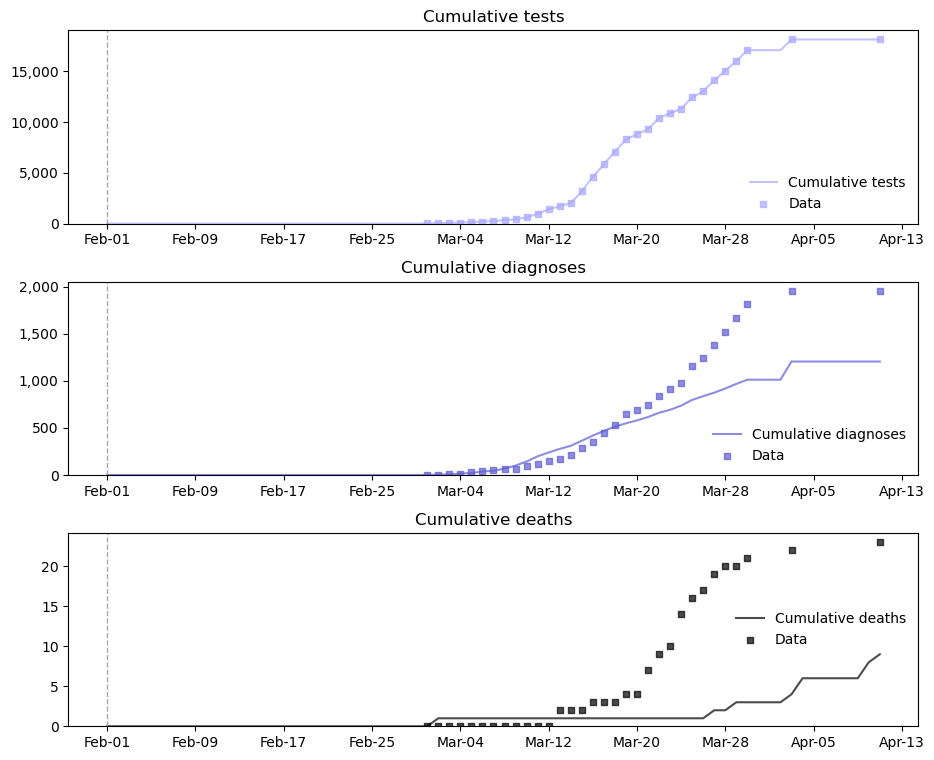

In [6]:
sim.run()
sim.plot(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])

In [18]:
sim.result_keys()

['cum_infections',
 'cum_reinfections',
 'cum_infectious',
 'cum_symptomatic',
 'cum_severe',
 'cum_critical',
 'cum_recoveries',
 'cum_deaths',
 'cum_tests',
 'cum_diagnoses',
 'cum_known_deaths',
 'cum_quarantined',
 'cum_vaccinations',
 'cum_vaccinated',
 'new_infections',
 'new_reinfections',
 'new_infectious',
 'new_symptomatic',
 'new_severe',
 'new_critical',
 'new_recoveries',
 'new_deaths',
 'new_tests',
 'new_diagnoses',
 'new_known_deaths',
 'new_quarantined',
 'new_vaccinations',
 'new_vaccinated',
 'n_susceptible',
 'n_exposed',
 'n_infectious',
 'n_symptomatic',
 'n_severe',
 'n_critical',
 'n_recovered',
 'n_dead',
 'n_diagnosed',
 'n_known_dead',
 'n_quarantined',
 'n_vaccinated',
 'n_alive',
 'n_naive',
 'n_preinfectious',
 'n_removed',
 'prevalence',
 'incidence',
 'r_eff',
 'doubling_time',
 'test_yield',
 'rel_test_yield',
 'frac_vaccinated',
 'pop_nabs',
 'pop_protection',
 'pop_symp_protection']

In [7]:
fit = sim.compute_fit()   #  normalized absolute difference. why normalized ?
                        # how are they calculating 
print(fit.mismatches)

#0. cum_deaths:    84.78260869565216
#1. cum_tests:     0.0
#2. cum_diagnoses: 16.682839632277833


In [8]:
print(fit.mismatch)

101.46544832792999


In [9]:
sim.results['cum_diagnoses'].values

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       3.000e+00, 6.000e+00, 1.400e+01, 2.100e+01, 3.600e+01, 4.500e+01,
       6.700e+01, 1.000e+02, 1.430e+02, 1.980e+02, 2.390e+02, 2.770e+02,
       3.100e+02, 3.640e+02, 4.180e+02, 4.690e+02, 5.140e+02, 5.490e+02,
       5.800e+02, 6.160e+02, 6.610e+02, 6.930e+02, 7.370e+02, 7.980e+02,
       8.380e+02, 8.750e+02, 9.200e+02, 9.680e+02, 1.013e+03, 1.013e+03,
       1.013e+03, 1.013e+03, 1.206e+03, 1.206e+03, 1.206e+03, 1.206e+03,
       1.206e+03, 1.206e+03, 1.206e+03, 1.206e+03, 1.206e+03])

In [36]:
v = df['new_diagnoses']

In [38]:
sum(v)

1958

In [ ]:
# calibrate

In [10]:
# rel_death_prob calibration
for dp in range(1,5):
    sim['rel_death_prob'] = dp
    sim.initialize(reset=True) 
    sim.run()
    fit = sim.compute_fit()
    print(f'dp: {dp} mismatch: {fit.mismatch}')

dp: 1 mismatch: 101.46544832792999
dp: 2 mismatch: 94.80581338544212
dp: 3 mismatch: 88.680552471466
dp: 4 mismatch: 84.08946573699872


#0. cum_deaths:    78.2608695652174
#1. cum_tests:     0.0
#2. cum_diagnoses: 16.544943820224717
94.80581338544212


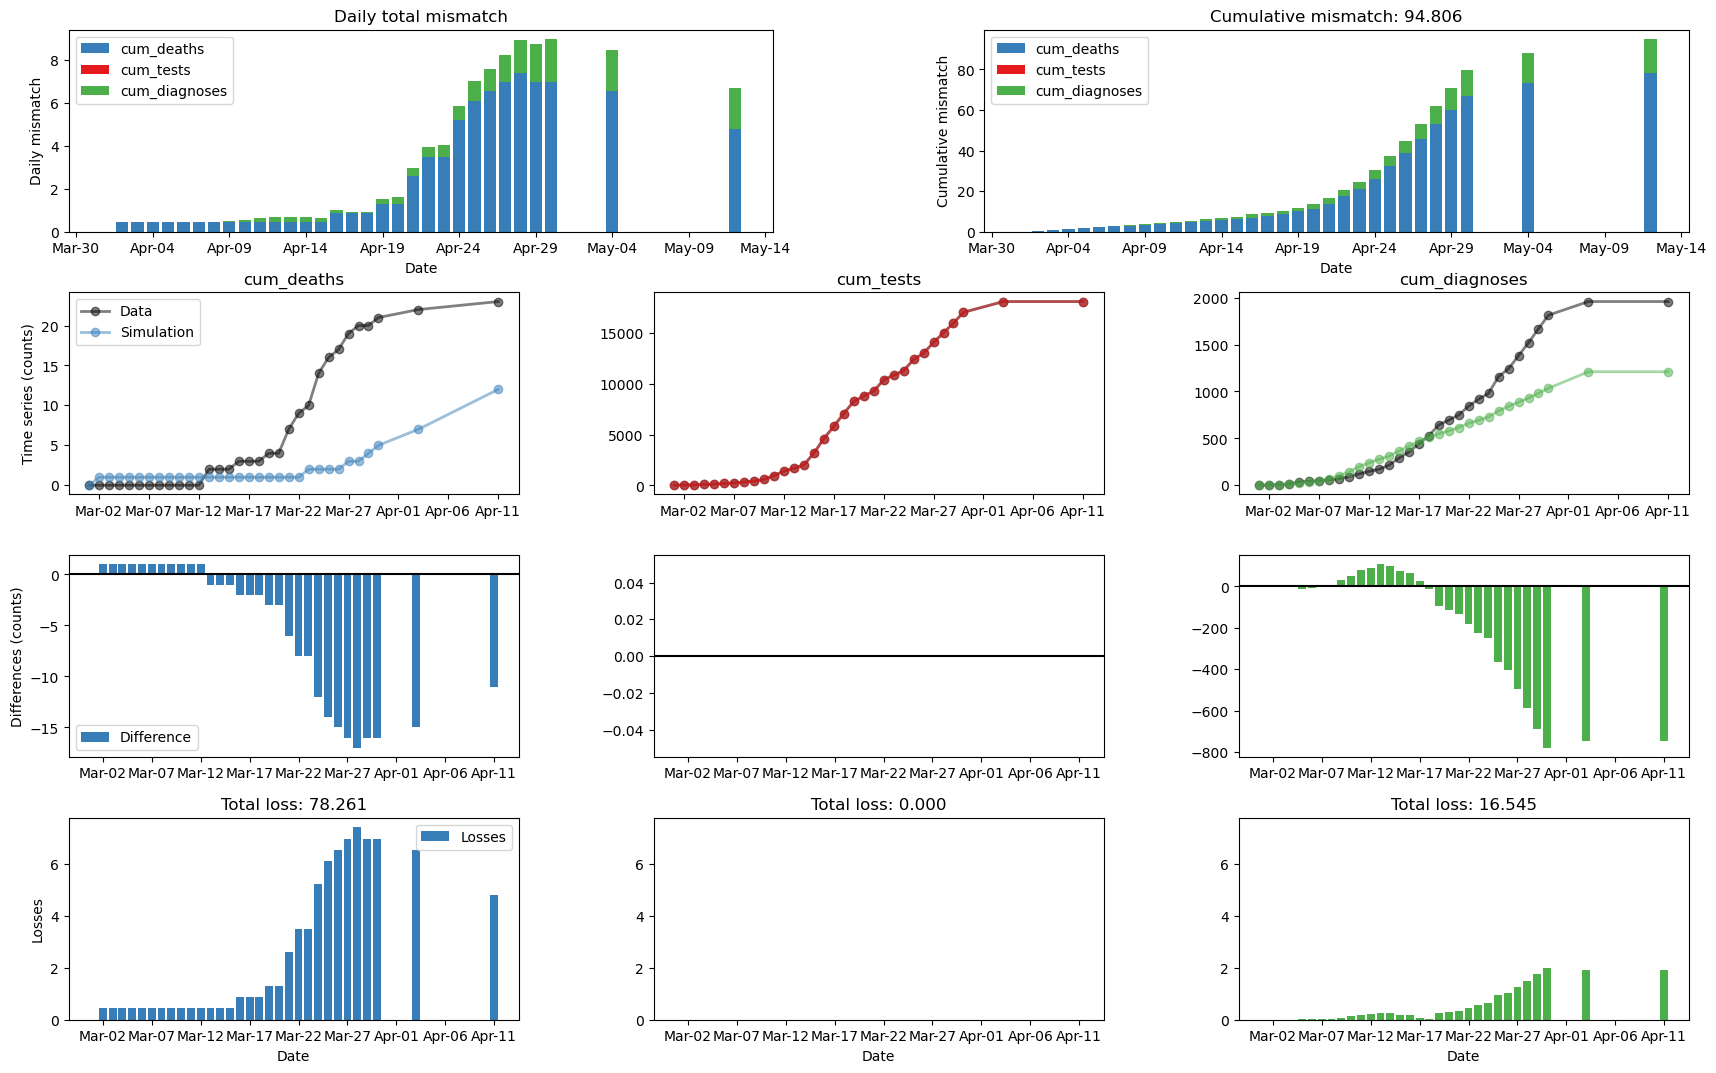

In [11]:
sim['rel_death_prob'] = 2
sim.initialize(reset=True) 
sim.run()
fit = sim.compute_fit()

# sim.plot(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])
fit.plot()
print(fit.mismatches)
print(fit.mismatch)

In [12]:
df.head()

,date,new_diagnoses,new_tests,new_deaths
0,2020-03-01,1,24,0
1,2020-03-02,3,22,0
2,2020-03-03,2,15,0
3,2020-03-04,8,40,0
4,2020-03-05,20,38,0


In [13]:
sim.results['new_diagnoses'].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   3.,   8.,
         7.,  15.,   9.,  22.,  33.,  43.,  55.,  41.,  38.,  33.,  54.,
        54.,  51.,  45.,  35.,  31.,  36.,  45.,  32.,  37.,  63.,  48.,
        44.,  45.,  52.,  52.,   0.,   0.,   0., 176.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [14]:
import scipy

def objective(x, n_runs=10):
    print(f'Running sim for beta={x[0]}, rel_death_prob={x[1]}')
    pars = dict(
        pop_size       = 20_000,
        start_day      = '2020-02-01',
        end_day        = '2020-04-11',
        beta           = x[0],
        rel_death_prob = x[1],
        verbose        = 0,
    )
    sim = cv.Sim(pars=pars, datafile=example_data, interventions=cv.test_num(daily_tests='data'))
    msim = cv.MultiSim(sim)
    msim.run(n_runs=n_runs)
    mismatches = []
    for sim in msim.sims:
        fit = sim.compute_fit()
        mismatches.append(fit.mismatch)
    mismatch = np.mean(mismatches)
    return mismatch

guess = [0.015, 1] # Initial guess of parameters -- beta and relative death probability
pars = scipy.optimize.minimize(objective, x0=guess, method='nelder-mead') # Run the optimization

Running sim for beta=0.015, rel_death_prob=1.0
Running sim for beta=0.01575, rel_death_prob=1.0
Running sim for beta=0.015, rel_death_prob=1.05
Running sim for beta=0.014249999999999999, rel_death_prob=1.0499999999999998
Running sim for beta=0.013499999999999998, rel_death_prob=1.0749999999999997
Running sim for beta=0.013499999999999998, rel_death_prob=1.125
Running sim for beta=0.012749999999999997, rel_death_prob=1.1875
Running sim for beta=0.011999999999999997, rel_death_prob=1.1499999999999997
Running sim for beta=0.014249999999999999, rel_death_prob=1.075
Running sim for beta=0.012749999999999997, rel_death_prob=1.1249999999999998
Running sim for beta=0.013874999999999998, rel_death_prob=1.0875
Running sim for beta=0.013874999999999998, rel_death_prob=1.1375000000000002
Running sim for beta=0.014062499999999999, rel_death_prob=1.1687500000000002
Running sim for beta=0.014249999999999999, rel_death_prob=1.1
Running sim for beta=0.013687499999999998, rel_death_prob=1.11875
Running 

In [15]:
pars.x

array([0.0138501 , 1.14067383])

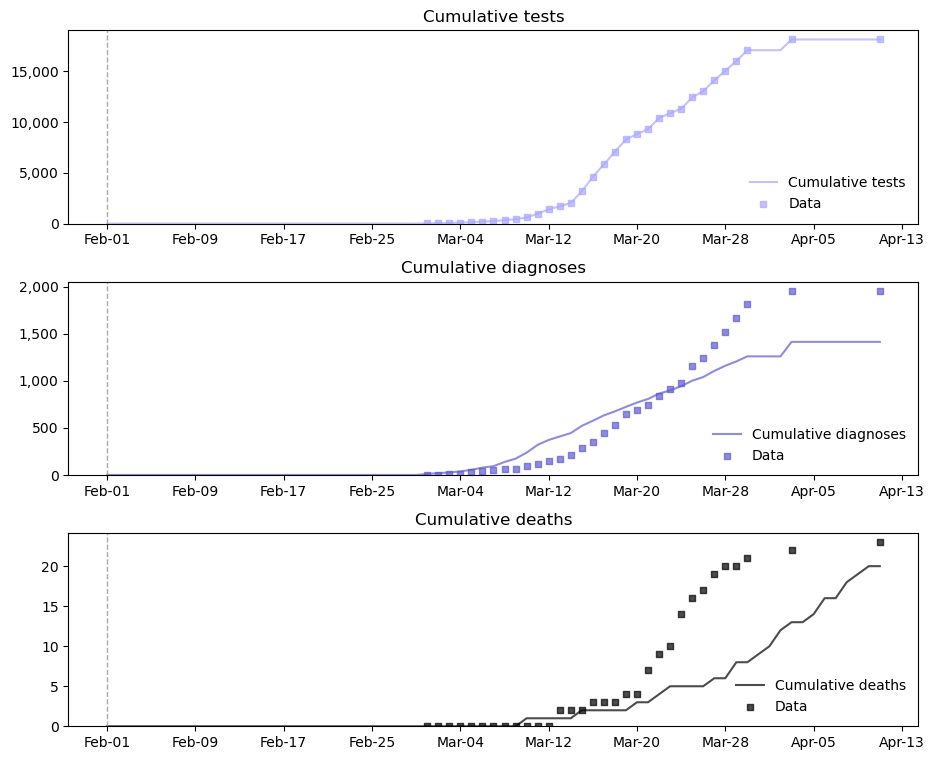

In [16]:
sim['beta'] = pars.x[0]
sim['rel_death_prob'] = pars.x[1]

sim.initialize(reset=True) 
sim.run()
fit = sim.compute_fit()
# not much improvement
sim.plot(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])
# fit.plot()
# print(fit.mismatches)
# print(fit.mismatch)

In [17]:
import sciris as sc

# Create default simulation
pars = sc.objdict(
    pop_size       = 20_000,
    start_day      = '2020-02-01',
    end_day        = '2020-04-11',
    beta           = 0.015,
    rel_death_prob = 1.0,
    interventions  = cv.test_num(daily_tests='data'),
    verbose        = 0,
)
sim = cv.Sim(pars=pars, datafile=example_data)

# Parameters to calibrate -- format is best, low, high
calib_pars = dict(
    beta           = [pars.beta, 0.005, 0.20],
    rel_death_prob = [pars.rel_death_prob, 0.5, 3.0],
)

n_trials = 20
n_workers = 4
calib = sim.calibrate(calib_pars=calib_pars, n_trials=n_trials, n_workers=n_workers)


ModuleNotFoundError: Optuna import failed (No module named 'optuna'), please install first (pip install optuna)

In [ ]:
calib.plot(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])

In [15]:
for k, d in df['new_diagnoses'].iteritems():
    print(f'{d} {k}')

1 0
3 1
2 2
8 3
20 4
9 5
6 6
13 7
6 8
25 9
28 10
27 11
22 12
43 13
76 14
65 15
88 16
86 17
115 18
51 19
55 20
95 21
74 22
63 23
178 24
83 25
140 26
137 27
150 28
144 29
145 30
0 31
